## Anna Valentine
### ENGG139.2: Polar Engineering, Polar Hydro
### HW3: SEA ICE FORCING

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
### make plots pretty: 
import seaborn as sns
## let's apply seasobrn as our default theme
sns.set_theme()

In [62]:
## import csv into pandas dataframe
sd = pd.read_csv('SolarDecl.csv')

In [63]:
sd

,Date,Julian Day,Declination
0,1/15/2023,15,-21.272709
1,2/15/2023,46,-12.952339
2,3/15/2023,74,-2.436834
3,4/15/2023,105,9.480771
4,5/15/2023,135,18.673624
5,6/15/2023,166,23.285925
6,7/15/2023,196,21.663912
7,8/15/2023,227,14.300517
8,9/15/2023,258,3.343032
9,10/15/2023,288,-8.217747


### Calculations

In [64]:
#### I loaded in with Excel, so let's just use our declination angle now: 
## convert to theta
theta_eq = []
for d in sd['Declination']: theta_eq.append(70 - d)

In [65]:
theta_eq

[91.27270936,
 82.95233888,
 72.43683372699999,
 60.519229042,
 51.32637642,
 46.7140747,
 48.33608779,
 55.699483459999996,
 66.65696805,
 78.217746935,
 88.30313282,
 93.21942386]

In [66]:
## now calculate R_toa
def R_toa_calc(theta_list):
    R_toa = []
    for th in theta_list: 
        if th < 90:
            R_toa.append(1.36*0.7*((1/np.cos(th*(np.pi/180)))**0.678))
        else:
            R_toa.append(0)
    return R_toa

In [67]:
R_toa = R_toa_calc(theta_eq)

In [68]:
R_toa

[0,
 3.9483211288005626,
 2.1450094665350212,
 1.5395931132737646,
 1.3094390094075279,
 1.2296002770749637,
 1.2556545697469335,
 1.4044729127190698,
 1.7833015444679323,
 2.795306763599581,
 10.351085509851499,
 0]

In [69]:
## replace nan with 0 
R_toa = [0 if x != x else x for x in R_toa]

In [70]:
### calculate forcing
fa = 0.75
d_albedo = 0.3
forcing = []
for r in R_toa: forcing.append(r*fa*d_albedo)

In [71]:
forcing

[0.0,
 0.8883722539801265,
 0.48262712997037976,
 0.346408450486597,
 0.29462377711669374,
 0.27666006234186685,
 0.28252227819306003,
 0.31600640536179064,
 0.40124284750528477,
 0.6289440218099057,
 2.3289942397165873,
 0.0]

In [72]:
# okay so average over our summer months: 
f_avg = (forcing[5] + forcing[6] + forcing[7])/3
print(f_avg)

0.2917295819655725


In [73]:
## W/m^2
tot = f_avg * (3/12) * ((3.4*10**6)/(5.1*10**8)) * 1000  # find total forcing:
print("the average global forcing due to ice sheet loss is", tot, " W/m^2")


the average global forcing due to ice sheet loss is 0.48621596994262095  W/m^2


### Commentary: 
this is much smaller than the change in forcing due to to CO2 (about 3.71 w/m^2). Although small, this is still a somewhat significant amount of forcing, and the change in sea ice could lead to other feedback systems that increase forcing. 

## PART 2: 

In [74]:
### find R_toa for 44 and 65 lat: 
#### I loaded in with Excel, so let's just use our declination angle now: 
## convert to theta
theta_44 = []
for d in sd['Declination']: theta_44.append(44 - d)
    
theta_65 = []
for d in sd['Declination']: theta_65.append(65 - d)

In [75]:
## Calculate R_toa
R_toa_44 = R_toa_calc(theta_44)
R_toa_65 = R_toa_calc(theta_65)

In [76]:
### calculate Rs, and convert to MJ/ m^2 *day
Rs_44 = []
for rt in R_toa_44: Rs_44.append(np.sqrt(fa)*rt*(86400*.001))

Rs_65 = []
for rt in R_toa_65: Rs_65.append(np.sqrt(fa)*rt*86400*.001)

In [77]:
### calculate E0
Ka = 0.0123
T_max = 5  # deg C

E0_44 = []
for rs in Rs_44: E0_44.append((Ka*(23.89*rs + 50)*T_max)/(T_max + 15))
    
E0_65 = []
for rs in Rs_65: E0_65.append((Ka*(23.89*rs + 50)*T_max)/(T_max + 15))

### Snowmelt

In [78]:
Cm = 1.74 ## mm/ degree days * deg C
T_snow = 0 ## deg C
T_air = 2.5 ## deg C

M = Cm*(T_air - T_snow)
print(M)

4.35


### plot

In [81]:
dates = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov','Oct', 'Dec']

Text(0.5, 1.0, 'E0 Values over year')

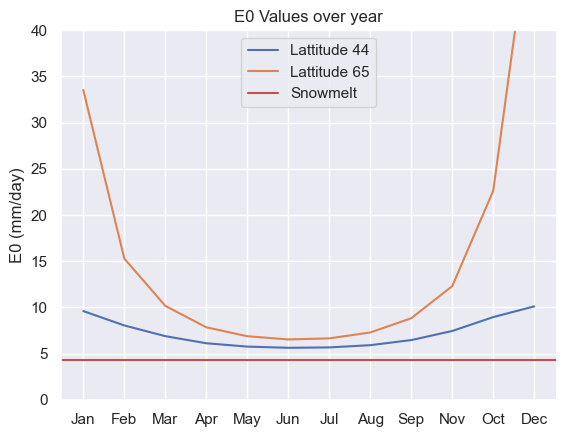

In [89]:
plt.plot(dates, E0_44, label = "Lattitude 44")
plt.plot(dates, E0_65, label = "Lattitude 65")
plt.axhline(y=M, color='r', linestyle='-', label= "Snowmelt")  
plt.legend()
plt.ylim(0, 40)
plt.ylabel("E0 (mm/day)")
plt.title("E0 Values over year")

### explanation of how earlier snowmelt events may impact freshwater supply at each latitude.
Looking at our plots, if snowmelt occurs earlier in the year, then we might see a shift where a high rate of snowmelt coincides with high evaporation rates, and we will see that there is less freshwater infiltrating into streams and rivers. This would be more of an extreme affect at latitude of 65. 

## Salty Briny Porosity

In [48]:
temps = np.arange(-10, 1, 1)

In [49]:
coeff = [-3.9921, -22.700, -1.0015, -0.019956]

In [50]:
s_b_calc = lambda T: coeff[0] + coeff[1]*T + coeff[2]*(T**2) + coeff[3]*(T**3)
s_brine = s_b_calc(temps)

In [51]:
## density of brine
rb_calc = lambda s_brine: 1000 + 0.9999*s_brine
rho_brine = rb_calc(s_brine)

In [52]:
### find rho_salt ice
rho_fi = 917 # g/m^3
S_si = 5 ## ppt

rho_si = lambda rho_b, s_b : (rho_fi*rho_b*s_b)/(rho_b*s_b - S_si*(rho_b- rho_fi))
rho_salt_ice = rho_si(rho_brine, s_brine)

In [53]:
### finally, we can find porosity: 
porosity = lambda r_si, s_si, r_b, s_b: (r_si*s_si)/(r_b*s_b)

n = porosity(rho_salt_ice, S_si, rho_brine, s_brine)

Text(0.5, 1.0, 'Sea Ice Porosity vs. Temp')

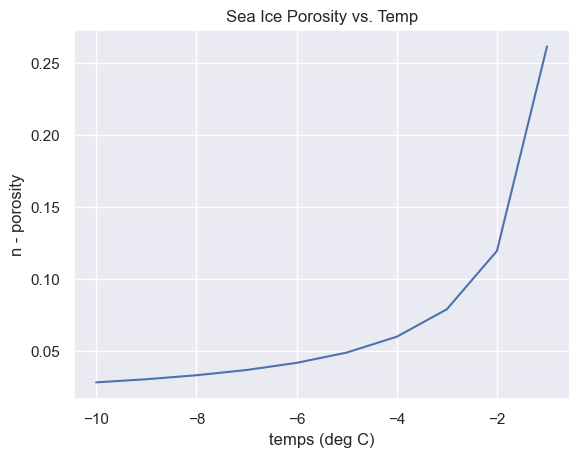

In [91]:
plt.plot(temps[:-1], n[:-1])
plt.xlabel("temps (deg C)")
plt.ylabel("n - porosity")
plt.title("Sea Ice Porosity vs. Temp")

### a.) classic percolation theory:
With classic percolation theory, percolation should happen at porosities around 20-25%, so according to our data, this would be a temperature of about -1 deg celsius. 

### b.) If Golden et al. (1998):
According to Golden et. al. the porosity for ice to become permeable is closer to 5%, which would occur at about -6.5 degrees celsius. 